# Basic import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from prophet.diagnostics import cross_validation, performance_metrics
from pmdarima import auto_arima
from tensorflow.keras.optimizers import Adam

# Load data and copy dataframe

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
initial_df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_573490.csv')
df = initial_df.copy()
df.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
171,Namibia,NAM,"Population, total",SP.POP.TOTL,590181.0,601424.0,613808.0,627358.0,642054.0,657887.0,674818.0,693063.0,712427.0,732881.0,754467.0,776995.0,800610.0,824918.0,850091.0,876572.0,901840.0,926109.0,942023.0,957334.0,975994.0,987394.0,1005520.0,1033085.0,1061995.0,1093311.0,1127989.0,1165430.0,1207949.0,1288070.0,1369011.0,1415617.0,1461687.0,1509834.0,1558449.0,1605370.0,1650066.0,1693242.0,1735953.0,1778277.0,1819141.0,1856402.0,1888525.0,1915425.0,1939406.0,1962865.0,1986558.0,2011492.0,2038552.0,2067919.0,2099271.0,2132340.0,2167470.0,2204510.0,2243001.0,2282704.0,2323352.0,2364534.0,2405680.0,2446644.0,2489098.0,2530151.0,2567012.0,NaN,NaN
260,Samoa,WSM,"Population, total",SP.POP.TOTL,113335.0,116820.0,120163.0,123416.0,126582.0,129789.0,132976.0,135752.0,138154.0,140457.0,142771.0,145064.0,147332.0,149587.0,152240.0,155263.0,158136.0,160362.0,161988.0,163489.0,164905.0,166190.0,166885.0,166944.0,166779.0,166517.0,166365.0,166773.0,167452.0,167886.0,168186.0,168701.0,169799.0,171362.0,173107.0,174902.0,176713.0,178543.0,180385.0,182211.0,184008.0,185530.0,186630.0,187440.0,188073.0,188626.0,189379.0,190478.0,191787.0,193176.0,194672.0,196351.0,198124.0,199939.0,201757.0,203571.0,205544.0,207630.0,209701.0,211905.0,214929.0,218764.0,222382.0,NaN,NaN
38,Channel Islands,CHI,"Population, total",SP.POP.TOTL,109186.0,110225.0,111281.0,112410.0,113596.0,114832.0,116116.0,117430.0,118707.0,119884.0,121003.0,122162.0,123348.0,124465.0,125486.0,126393.0,127052.0,127425.0,127667.0,127850.0,127984.0,128510.0,129614.0,130881.0,132154.0,133450.0,134808.0,136264.0,137765.0,139228.0,140601.0,141557.0,142011.0,142291.0,142466.0,142559.0,142898.0,143549.0,144211.0,144811.0,145306.0,146044.0,147167.0,148341.0,149538.0,150763.0,151985.0,153225.0,154475.0,155721.0,156933.0,157819.0,158621.0,159794.0,160912.0,162190.0,163721.0,165215.0,167259.0,169410.0,171113.0,172683.0,174079.0,NaN,NaN
78,Faroe Islands,FRO,"Population, total",SP.POP.TOTL,34154.0,34572.0,34963.0,35385.0,35841.0,36346.0,36825.0,37234.0,37630.0,38011.0,38416.0,38861.0,39304.0,39746.0,40189.0,40626.0,41054.0,41481.0,41965.0,42506.0,43054.0,43613.0,44164.0,44669.0,45135.0,45575.0,46011.0,46477.0,46959.0,47490.0,47479.0,46810.0,46005.0,45096.0,44131.0,43805.0,44138.0,44495.0,44865.0,45203.0,45660.0,46245.0,46813.0,47392.0,47989.0,48291.0,48313.0,48361.0,48411.0,48429.0,48410.0,48386.0,48392.0,48418.0,48465.0,48816.0,49500.0,50230.0,50955.0,51681.0,52415.0,52889.0,53090.0,NaN,NaN
221,Slovak Republic,SVK,"Population, total",SP.POP.TOTL,4068095.0,4191667.0,4238188.0,4282017.0,4327341.0,4370983.0,4411666.0,4449367.0,4483915.0,4518607.0,4538223.0,4557449.0,4596622.0,4641445.0,4689623.0,4739105.0,4789507.0,4840501.0,4890125.0,4938973.0,4979815.0,5016105.0,5055099.0,5091971.0,5127097.0,5161768.0,5193838.0,5222840.0,5250596.0,5275942.0,5299187.0,5303294.0,5305016.0,5325305.0,5346331.0,5361999.0,5373361.0,5383291.0,5390516.0,5396020.0,5388720.0,5378867.0,5376912.0,5373374.0,5372280.0,5372807.0,5373054.0,5374622.0,5379233.0,5386406.0,5391428.0,5398384.0,5407579.0,5413393.0,5418649.0,5423801.0,5430798.0,5439232.0,5446771.0,5454147.0,5458827.0,5447247.0,5431752.0,NaN,NaN


In [4]:
df.shape

(266, 69)

# Remove unimportant columns

In [5]:
df.drop(['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68', '2023', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)

# Check null values

In [6]:
df[df.isnull().any(axis=1)]

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
110,Not classified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978248.0,2068845.0,2163591.0,2262676.0,2366298.0,2474666.0,2587997.0,2706518.0,2776568.0,2848431.0,2922153.0,2997784.0,3075373.0,3154969.0,3236626.0,3320396.0,3406334.0,3494496.0,3591977.0,3689099.0,3786161.0,3882986.0,3979998.0,4076708.0,4173398.0,4270092.0,4367088.0,4454805.0,4569087.0,4685306.0,4803269.0,4922749.0,5043612.0


# Remove columns with null values

In [7]:
df.dropna(inplace=True)
df.shape

(264, 64)

# Transform the DataFrame to obtain a structure where years are used as the index and the columns represent different countries

In [8]:
df = df.set_index('Country Name').T
df.index = pd.to_datetime(df.index)
df.head()

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Central Europe and the Baltics,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.","Congo, Rep.",Colombia,Comoros,Cabo Verde,Costa Rica,Caribbean small states,Cuba,Curacao,Cayman Islands,Cyprus,Czechia,Germany,Djibouti,Dominica,Denmark,Dominican Republic,Algeria,East Asia & Pacific (excluding high income),Early-demographic dividend,East Asia & Pacific,Europe & Central Asia (excluding high income),Europe & Central Asia,Ecuador,"Egypt, Arab Rep.",Euro area,Eritrea,Spain,Estonia,Ethiopia,European Union,Fragile and conflict affected situations,Finland,Fiji,France,Faroe Islands,"Micronesia, Fed. Sts.",Gabon,United Kingdom,Georgia,Ghana,Gibraltar,Guinea,"Gambia, The",Guinea-Bissau,Equatorial Guinea,Greece,Grenada,Greenland,Guatemala,Guam,Guyana,High income,"Hong Kong SAR, China",Honduras,Heavily indebted poor countries (HIPC),Croatia,Haiti,Hungary,IBRD only,IDA & IBRD total,IDA total,IDA blend,Indonesia,IDA only,Isle of Man,India,Ireland,"Iran, Islamic Rep.",Iraq,Iceland,Israel,Italy,Jamaica,Jordan,Japan,Kazakhstan,Kenya,Kyrgyz Republic,Cambodia,Kiribati,St. Kitts and Nevis,"Korea, Rep.",Kuwait,Latin America & Caribbean (excluding high income),Lao PDR,Lebanon,Liberia,Libya,St. Lucia,Latin America & Caribbean,Least developed countries: UN classification,Low income,Liechtenstein,Sri Lanka,Lower middle income,Low & middle income,Lesotho,Late-demographic dividend,Lithuania,Luxembourg,Latvia,"Macao SAR, China",St. Martin (French part),Morocco,Monaco,Moldova,Madagascar,Maldives,Middle East & North Africa,Mexico,Marshall Islands,Middle income,North Macedonia,Mali,Malta,Myanmar,Middle East & North Africa (excluding high income),Montenegro,Mongolia,Northern Mariana Islands,Mozambique,Mauritania,Mauritius,Malawi,Malaysia,North America,Namibia,New Caledonia,Niger,Nigeria,Nicaragua,Netherlands,Norway,Nepal,Nauru,New Zealand,OECD members,Oman,Other small states,Pakistan,Panama,Peru,Philippines,Palau,Papua New Guinea,Poland,Pre-demographic dividend,Puerto Rico,"Korea, Dem. People's Rep.",Portugal,Paraguay,Pacific island small states,Post-demographic dividend,French Polynesia,Qatar,Romania,Russian Federation,Rwanda,South Asia,Saudi Arabia,Sudan,Senegal,Singapore,Solomon Islands,Sierra Leone,El Salvador,San Marino,Somalia,Serbia,Sub-Saharan Africa (excluding high income),South Sudan,Sub-Saharan Africa,Small states,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Eswatini,Sint Maarten (Dutch part),Seychelles,Syrian Arab Republic,Turks and Caicos Islands,Chad,East Asia & Pacific (IDA & IBRD countries),Europe & Central Asia (IDA & IBRD countries),Togo,Thailand,Tajikistan,Turkmenistan,Latin America & the Caribbean (IDA & IBRD countries),Timor-Leste,Middle East & North Africa (IDA & IBRD countries),Tonga,South Asia (IDA & IBRD),Sub-Saharan Africa (IDA & IBRD countries),Trinidad and Tobago,Tunisia,Turkiye,Tuvalu,Tanzania,Uganda,Ukraine,Upper middle income,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",British Virgin Islands,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960-01-01,54608.0,130692579.0,8622466.0,97256290.0,5357195.0,1608800.0,9443.0,93359407.0,133426.0,20349744.0,1904148.0,20085.0,55342.0,10276477.0,7047539.0,3894500.0,2746628.0,9153489.0,2512284.0,4783259.0,50396429.0,7867374.0,160691.0,114500.0,3262539.0,8198000.0,91403.0,44400.0,3707515.0,73092515.0,232550.0,85346.0,221266.0,512865.0,1679728.0,17909356.0,91401764.0,5327827.0,109186.0,8141820.0,667070000.0,3708661.0,5117608.0,1527

In [9]:
countries = {}
for country in df.columns:
    if country == 'Russia':
        continue
    countries[country] = df[country]

# Select several countries with different population change patterns (growth, decline, etc.) to test various predictive models

In [10]:
countries_for_test_list = ['Ukraine', 'Bulgaria', 'Bosnia and Herzegovina', 'Georgia', 'Czechia', 'Germany', 'United States', 'China', 'Japan']
countries_for_test = {country: countries[country] for country in countries_for_test_list}

# Create function for showing population dynamic

In [11]:
def convert_to_millions(x, pos):
    return '%1.2fM' % (x * 1e-6)
    
def show_population_graph(population, country_name):
    x = [str(year) for year in range(1960, 2022+1)]
    y = population.values.tolist()

    plt.figure(figsize=(16, 6))
    plt.plot(
        x, 
        y,
        color='b',
        marker='o',
    )
    plt.xticks(rotation=90)
    plt.title('Population dynamic for ' + country_name + ' (from 1960 to 2022)')
    plt.xlabel('Year')
    plt.ylabel('Population (in millions)')
    
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(convert_to_millions))
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)
    
    plt.show()

# Take a look at population change graphs of the selected countries

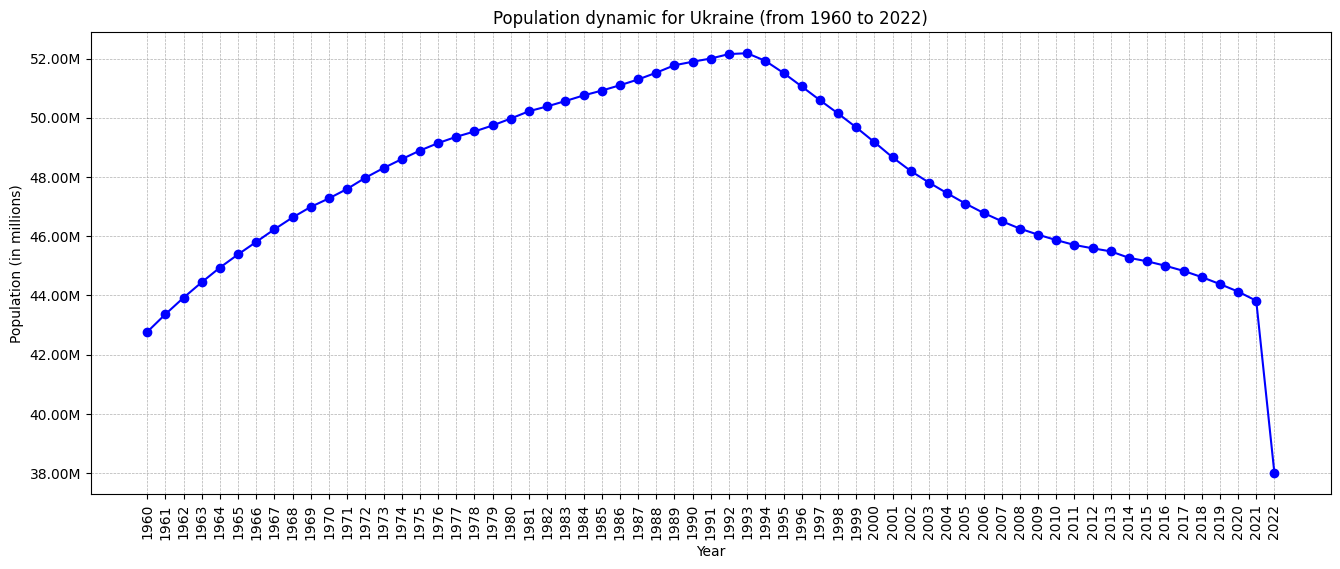

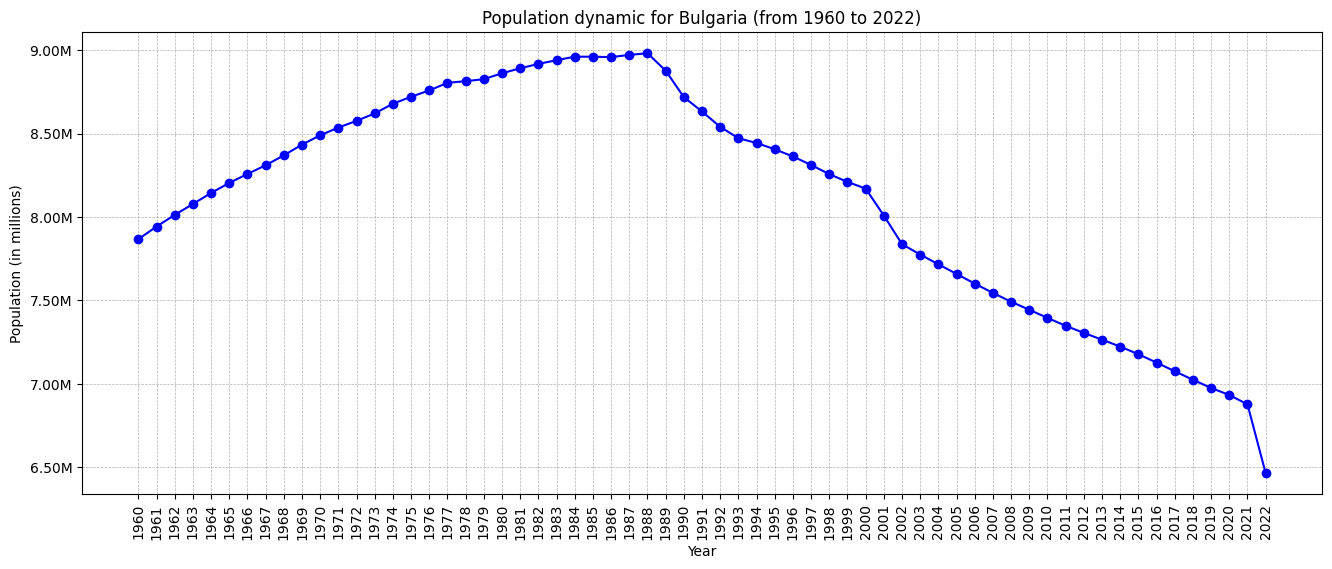

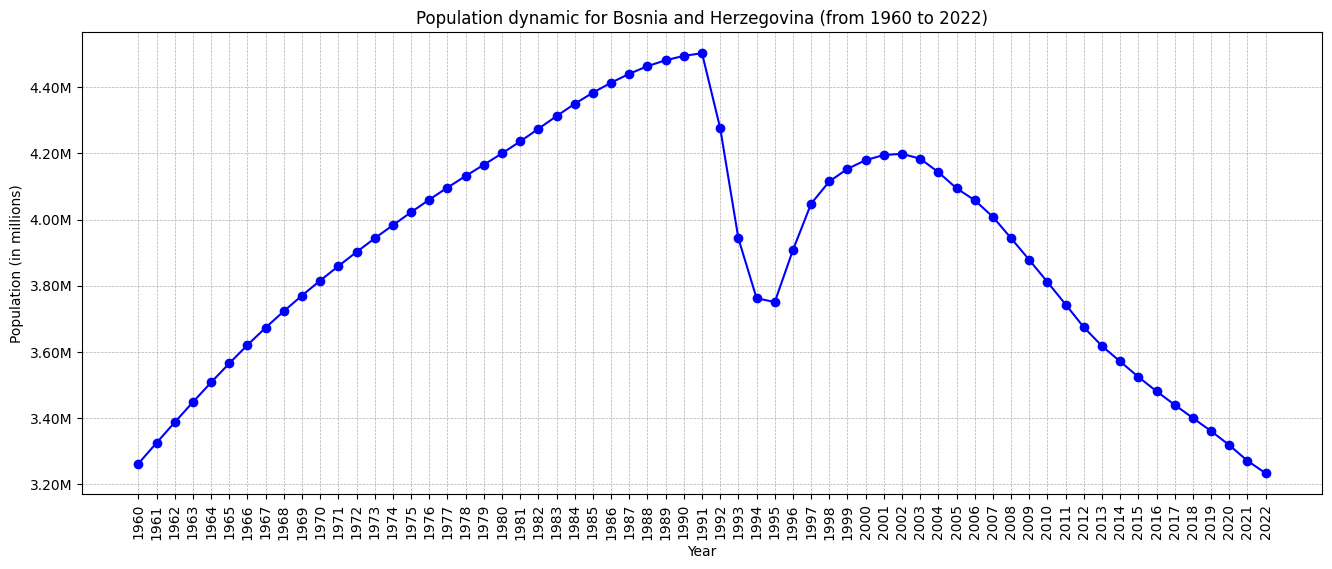

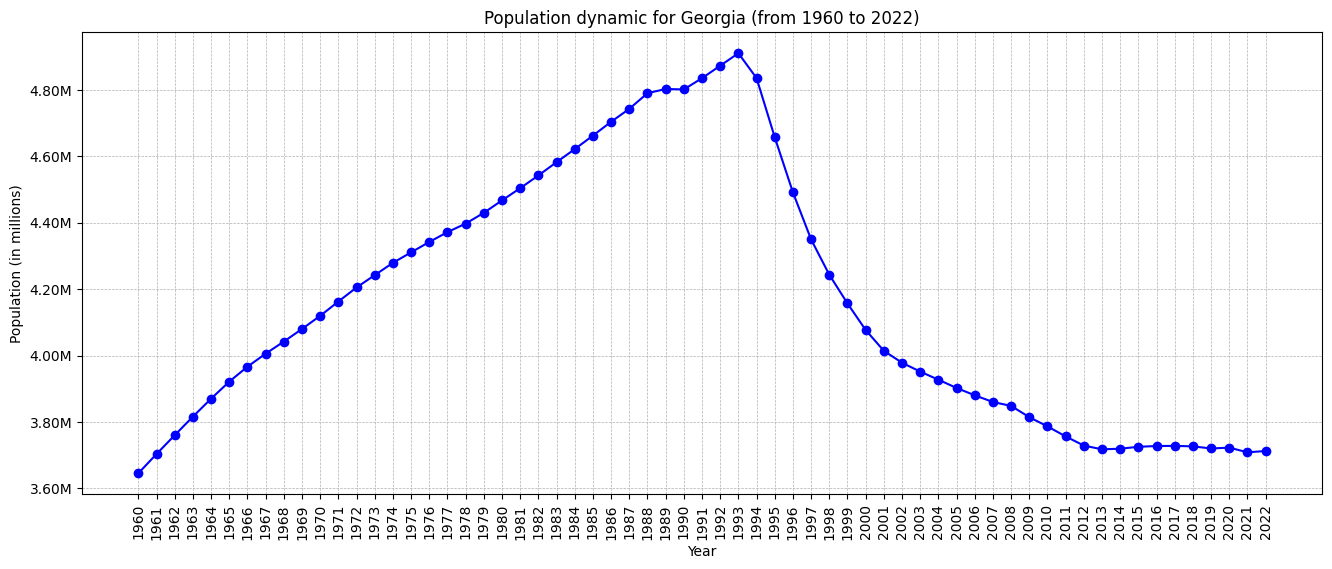

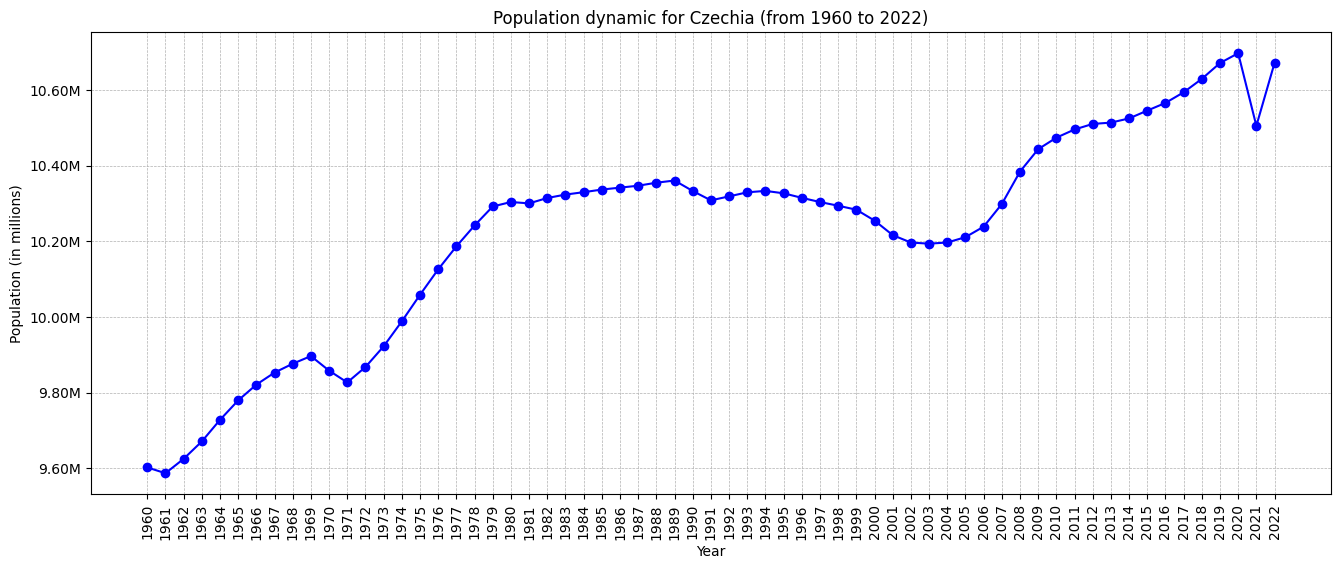

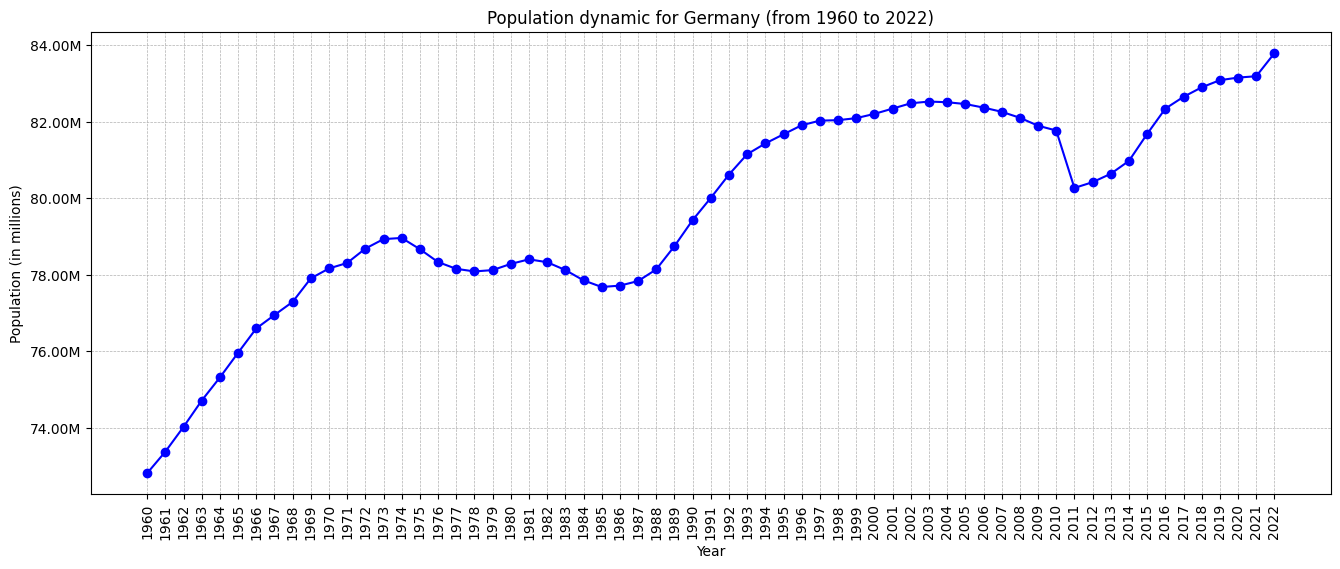

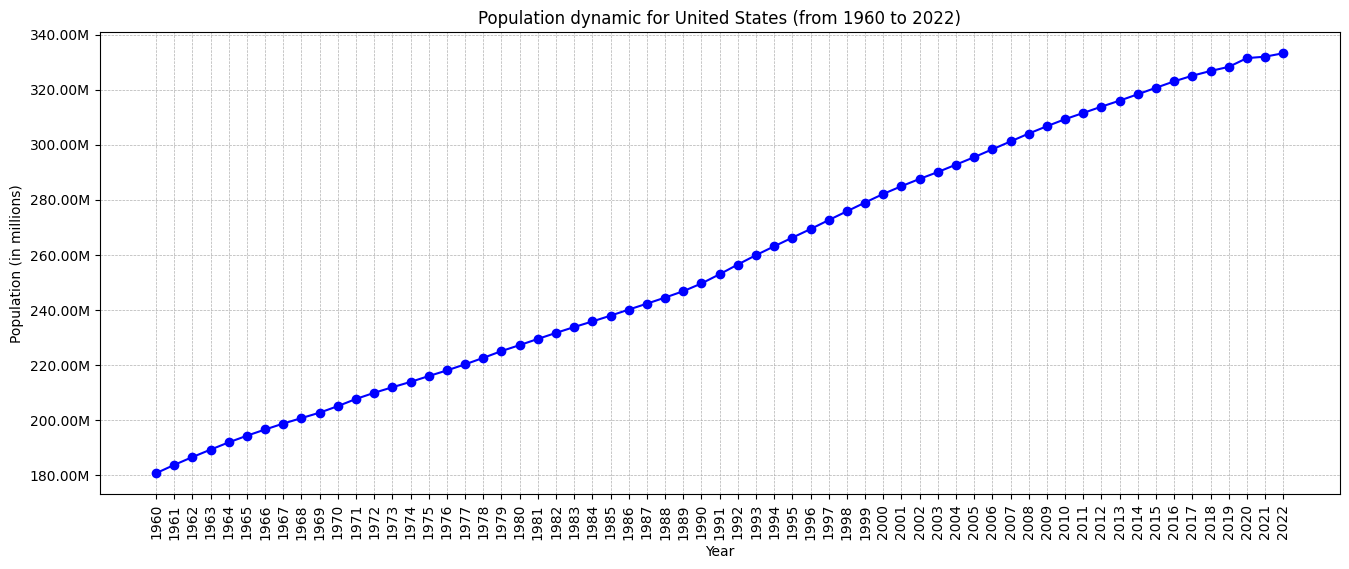

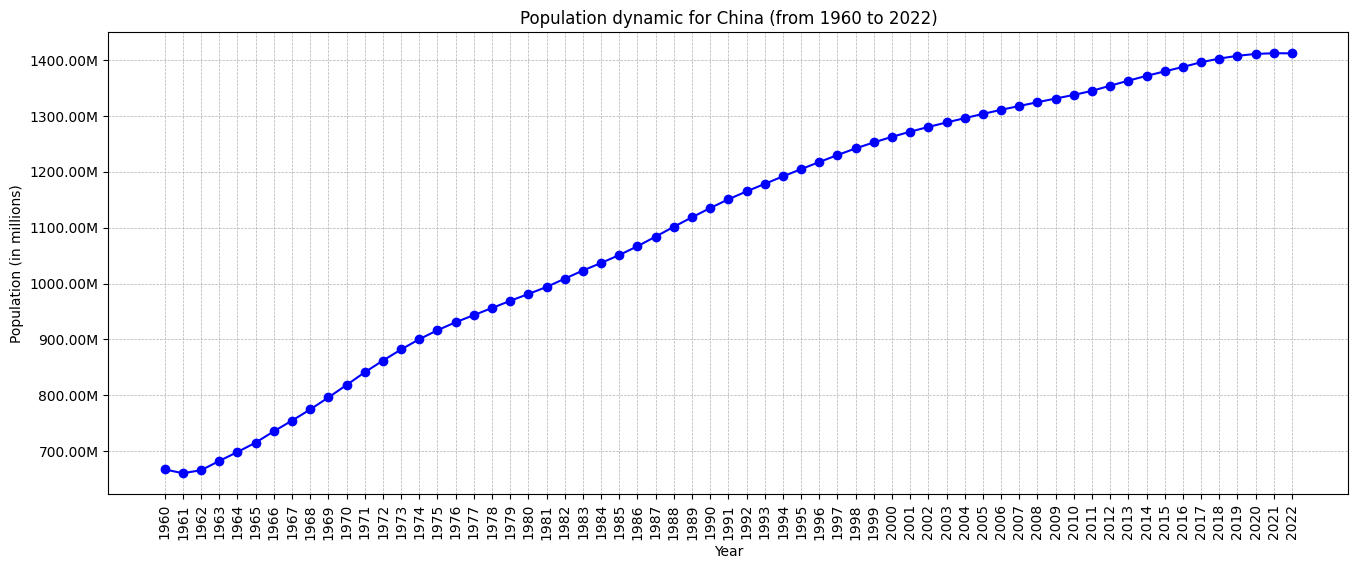

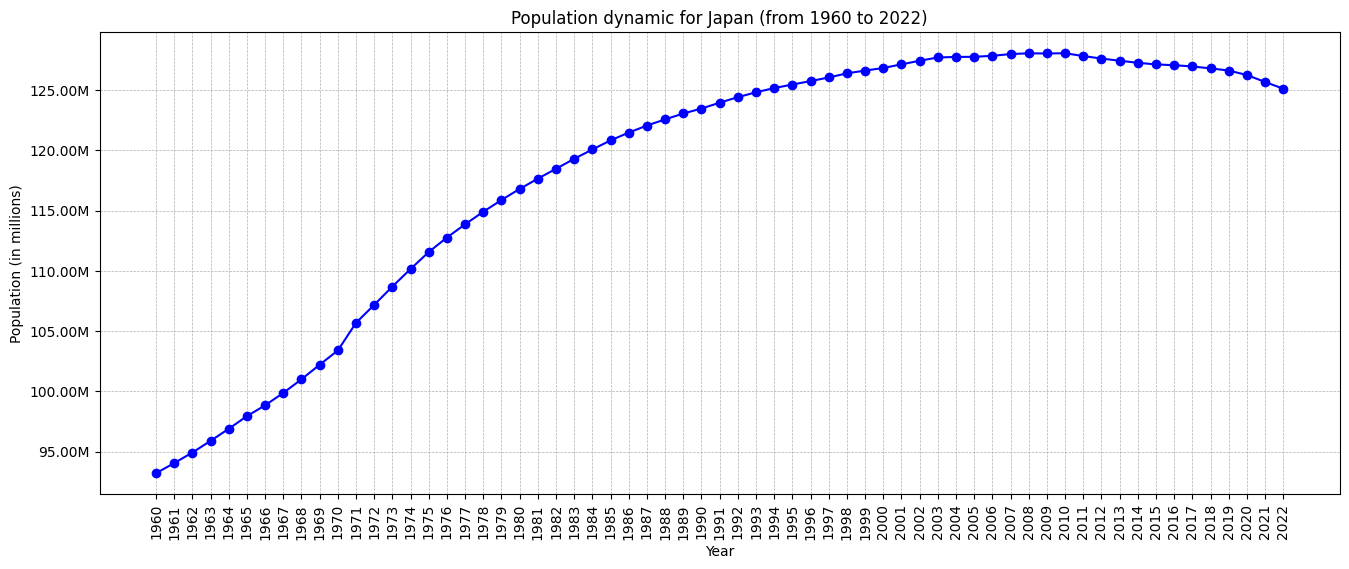

In [12]:
for country_name, country_data in countries_for_test.items():
    show_population_graph(country_data, country_name)

# Arima

In [13]:
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

def arima(country_data, country_name):
    
    test_stationarity(country_data)
    
    arma_mod = ARIMA(country_data, order=(2, 0, 2), trend="n")
    arma_res = arma_mod.fit()
    
    #print(arma_res.summary())

    fig, ax = plt.subplots(figsize=(15, 8))
    fig = plot_predict(arma_res, start="1970-01-01", end="2030-01-01", ax=ax)
    legend = ax.legend(loc="upper left")
    plt.title('ARIMA for ' + country_name)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(convert_to_millions))
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)
    plt.show()

def arima2(country_data, country_name):
    
    df_diff = country_data.diff()
    df_diff = df_diff.dropna()
    test_stationarity(df_diff)
    
    model_auto = auto_arima(df_diff, start_p=1, start_q=1,
                   test='adf',       # use adftest to find optimal 'd'
                   max_p=3, max_q=3, # maximum p and q
                   m=1,              # frequency of series
                   d=None,           # let model determine 'd'
                   seasonal=False,   # No Seasonality
                   start_P=0, 
                   D=0, 
                   trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

    #print(model_auto.summary())

    p, d, q = model_auto.order
    
    model = ARIMA(df_diff, order=(p,d,q))
    results = model.fit()
    print(results.summary())

    # Forecast 10 years into the future
    forecast = results.forecast(steps=10)
    print(forecast)

    last_value = country_data.iloc[-1]
    forecast_original_scale = last_value + forecast.cumsum()
    
    future_dates = pd.date_range(start=country_data.index[-1] + pd.DateOffset(years=1), periods=10, freq='YE')

    # Plot
    plt.figure(figsize=(12,6))
    plt.plot(country_data.index, country_data, label='Historical')
    plt.plot(future_dates, forecast_original_scale, label='Forecast')
    plt.legend()
    plt.title('Arima for ' + country_name)
    plt.show()

# Prophet

In [14]:
def prophet(country_data, country_name):
    data = country_data.reset_index(drop=False)
    data.rename(columns={'index': 'ds', country_name: 'y'}, inplace=True)
    model = Prophet(
        yearly_seasonality=False,
        changepoint_prior_scale=0.5,
        changepoint_range=0.7
    )
    model.fit(data)
    future = model.make_future_dataframe(periods=10, freq='YE')
    forecast = model.predict(future)
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(50))
    fig1 = model.plot(forecast)
    plt.title('Prophet for ' + country_name)
    plt.show()
    
    fig2 = model.plot_components(forecast)
    plt.show()

# LSTM

In [15]:
def lstm(country_data, country_name):
    scaler = MinMaxScaler()
    #scaler = StandardScaler()
    scaled_country_data = scaler.fit_transform(country_data.values.reshape(-1, 1))
    
    # Create sequences
    def create_sequences(data, seq_length):
        sequences = []
        for i in range((len(data) - seq_length) + 1):
            sequences.append(data[i:i + seq_length])
        return np.array(sequences)
    
    seq_length = 10
    sequences = create_sequences(scaled_country_data, seq_length)
    X = sequences[:, :-1]
    y = sequences[:, -1]

        
    # Split into training and testing sets
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    
    # Build the LSTM model
    model = Sequential([
        InputLayer((seq_length - 1, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()
    
    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
    
    # Predict and inverse transform the predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)

    print('X_test_inverse')
    print([[scaler.inverse_transform(sec)] for sec in X_test])
    print('y_test')
    print(scaler.inverse_transform(y_test))
    print('predictions')
    print(predictions)
    
    # Evaluate the model
    mse = np.mean((predictions - scaler.inverse_transform(y_test))**2)
    print(f'Mean Squared Error: {mse}')


def lstm_walk_forward_and_forecast(country_data, country_name, forecast_steps=10):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(country_data.values.reshape(-1, 1))
    
    def create_sequences(data, seq_length):
        X, y = [], []
        for i in range(len(data) - seq_length):
            X.append(data[i:(i + seq_length), 0])
            y.append(data[i + seq_length, 0])
        return np.array(X), np.array(y)
    
    def create_model(seq_length):
        model = Sequential([
            InputLayer((seq_length, 1)),
            LSTM(50, activation='relu'),
            Dense(1)
        ])
        model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
        return model
    
    seq_length = 5
    train_size = 30
    predictions = []
    actual_values = []
    
    # Walk-forward validation
    for i in range(train_size, len(scaled_data)):
        train_data = scaled_data[:i]
        X_train, y_train = create_sequences(train_data, seq_length)
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        
        model = create_model(seq_length)
        model.fit(X_train, y_train, epochs=100, verbose=0)
        
        X_test = scaled_data[i-seq_length:i].reshape(1, seq_length, 1)
        prediction = model.predict(X_test)
        predictions.append(prediction[0, 0])
        actual_values.append(scaled_data[i, 0])
        
        print(f"Predicted year {country_data.index[i]}")
    
    # Forecasting
    forecast = []
    last_sequence = scaled_data[-seq_length:].reshape(1, seq_length, 1)
    
    for _ in range(forecast_steps):
        next_pred = model.predict(last_sequence)
        forecast.append(next_pred[0, 0])
        last_sequence = np.roll(last_sequence, -1, axis=1)
        last_sequence[0, -1, 0] = next_pred[0, 0]
    
    # Inverse transform predictions, actual values, and forecast
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    actual_values = scaler.inverse_transform(np.array(actual_values).reshape(-1, 1))
    forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
    
    # Generate future dates for forecast
    last_date = country_data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=forecast_steps, freq='YE')
    
    # Visualization
    plt.figure(figsize=(15, 7))
    plt.plot(country_data.index[train_size:], actual_values, label='Actual')
    plt.plot(country_data.index[train_size:], predictions, label='Predicted')
    plt.plot(future_dates, forecast, label='Forecast', linestyle='--')
    plt.fill_between(country_data.index[train_size:], 
                     predictions.reshape(-1) - predictions.std(), 
                     predictions.reshape(-1) + predictions.std(), 
                     alpha=0.2)
    plt.title(f'LSTM Population Prediction and Forecast for {country_name}')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Calculate error metrics
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    mae = mean_absolute_error(actual_values, predictions)
    rmse = np.sqrt(mean_squared_error(actual_values, predictions))
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    
    # Print forecast
    print("\nForecast for the next 10 years:")
    for date, pop in zip(future_dates, forecast):
        print(f"{date.year}: {pop[0]:.0f}")

    return predictions, actual_values, forecast, future_dates

#predictions, actual_values, forecast, future_dates = lstm_walk_forward_and_forecast(country_data, "Country Name")

# Apply models for test countries

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted year 1990-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted year 1991-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted year 1992-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted year 1993-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted year 1994-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted year 1995-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted year 1996-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted year 1997-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted year 1998-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted year 1999-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted year 2000-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted year 2001-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted year 2002-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted yea

/tmp/ipykernel_1314127/2650934579.py:111: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')


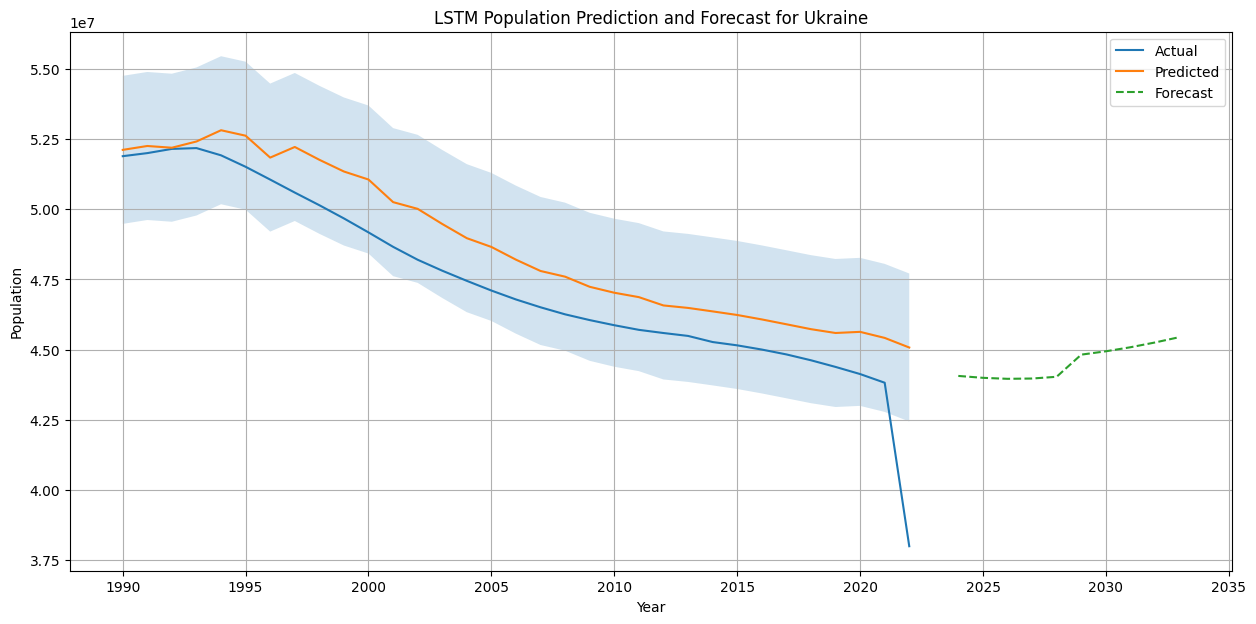

Mean Absolute Error: 1358418.0606060605
Root Mean Squared Error: 1753761.120388286

Forecast for the next 10 years:
2023: 44064932
2024: 43997444
2025: 43962188
2026: 43972596
2027: 44034392
2028: 44823348
2029: 44941856
2030: 45085852
2031: 45255920
2032: 45447384
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted year 1990-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted year 1991-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted year 1992-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted year 1993-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted year 1994-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted year 1995-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted year 1996-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted year 1997-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted year 1998-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted year 1999-01-01 00:00:00
1/1 

/tmp/ipykernel_1314127/2650934579.py:111: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')


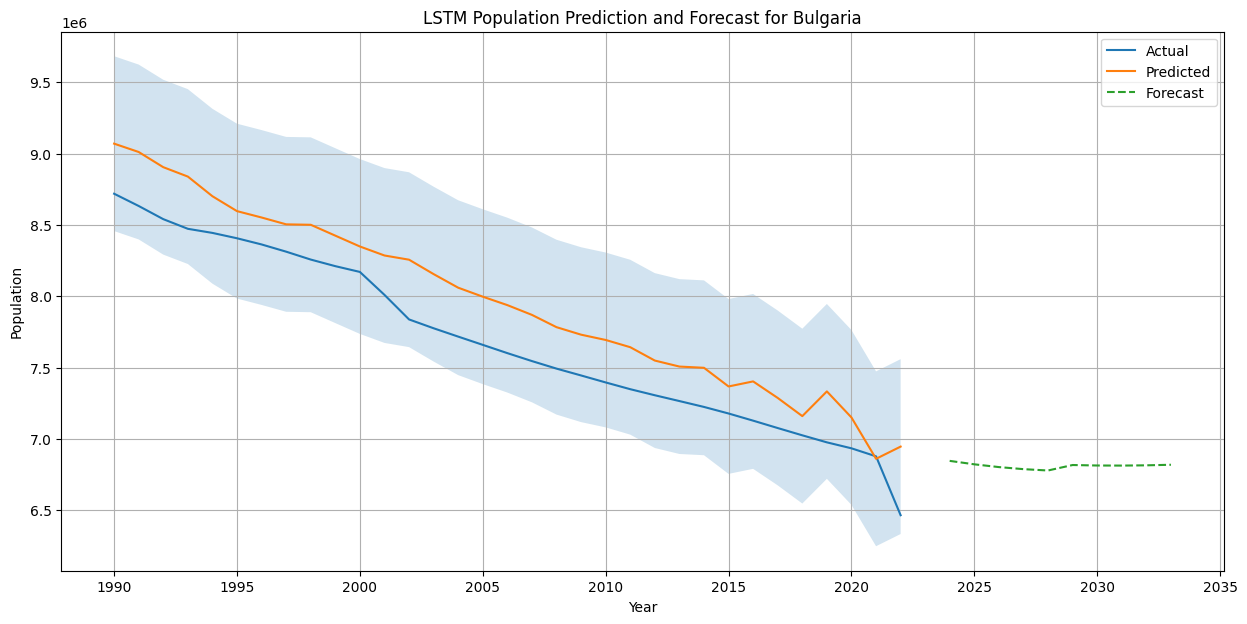

Mean Absolute Error: 277196.5757575757
Root Mean Squared Error: 291491.60992255405

Forecast for the next 10 years:
2023: 6845953
2024: 6821798
2025: 6802430
2026: 6787978
2027: 6778476
2028: 6816892
2029: 6813506
2030: 6812916
2031: 6814735
2032: 6818682
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted year 1990-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted year 1991-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted year 1992-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted year 1993-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted year 1994-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted year 1995-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted year 1996-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted year 1997-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted year 1998-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted year 1999-01-01 00:00:00
1/1 ━━━━━━━━━━

/tmp/ipykernel_1314127/2650934579.py:111: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')


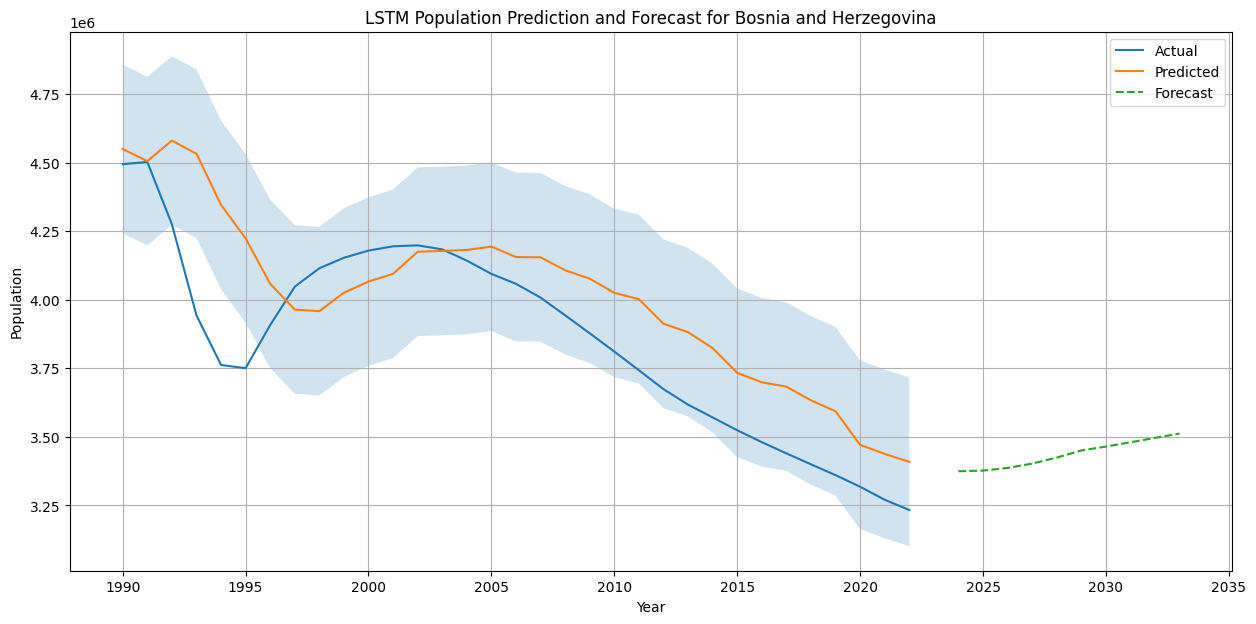

Mean Absolute Error: 193223.5530303031
Root Mean Squared Error: 237100.89850796058

Forecast for the next 10 years:
2023: 3374817
2024: 3377166
2025: 3386722
2026: 3402696
2027: 3424538
2028: 3450494
2029: 3464734
2030: 3480345
2031: 3496401
2032: 3512148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted year 1990-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted year 1991-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted year 1992-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted year 1993-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted year 1994-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted year 1995-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted year 1996-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted year 1997-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted year 1998-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted year 1999-01-01 00:00:00
1/1 ━━━━━━━━━━

/tmp/ipykernel_1314127/2650934579.py:111: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')


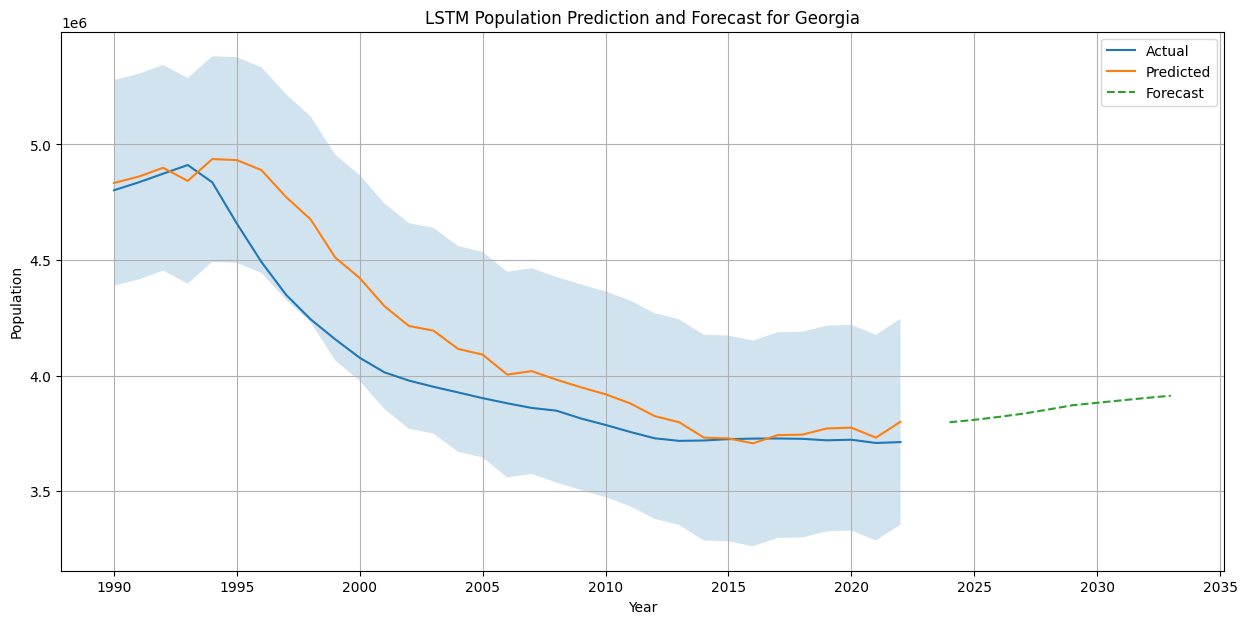

Mean Absolute Error: 148124.9242424243
Root Mean Squared Error: 196049.11845405897

Forecast for the next 10 years:
2023: 3798302
2024: 3808606
2025: 3821301
2026: 3835530
2027: 3853032
2028: 3871799
2029: 3882388
2030: 3893042
2031: 3903405
2032: 3913191
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted year 1990-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted year 1991-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted year 1992-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted year 1993-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted year 1994-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted year 1995-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted year 1996-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted year 1997-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted year 1998-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted year 1999-01-01 00:00:00
1/1 ━━━━━━━━━━

/tmp/ipykernel_1314127/2650934579.py:111: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')


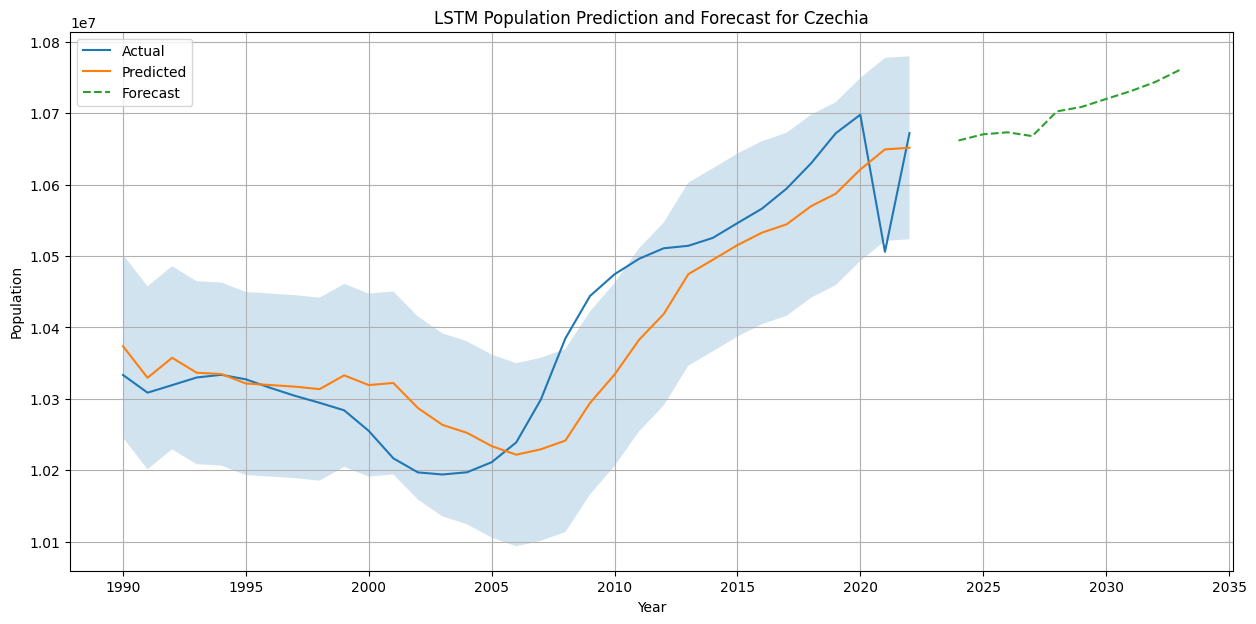

Mean Absolute Error: 57616.969696969754
Root Mean Squared Error: 72246.69625077352

Forecast for the next 10 years:
2023: 10661762
2024: 10670416
2025: 10673219
2026: 10667870
2027: 10702494
2028: 10708716
2029: 10719853
2030: 10730835
2031: 10743607
2032: 10760613
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted year 1990-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted year 1991-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted year 1992-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted year 1993-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted year 1994-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted year 1995-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted year 1996-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted year 1997-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted year 1998-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted year 1999-01-01 00:00:00
1/1 

/tmp/ipykernel_1314127/2650934579.py:111: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')


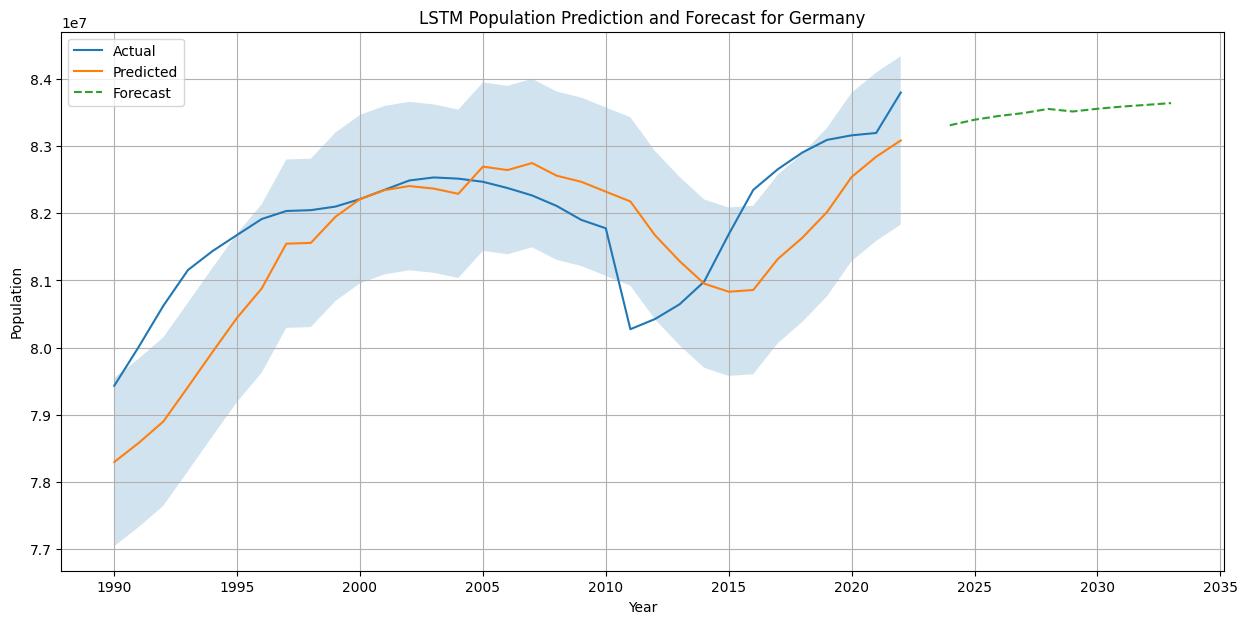

Mean Absolute Error: 771939.8484848485
Root Mean Squared Error: 954152.8001026498

Forecast for the next 10 years:
2023: 83310856
2024: 83392632
2025: 83449616
2026: 83492464
2027: 83553816
2028: 83515912
2029: 83556224
2030: 83588640
2031: 83614536
2032: 83640760
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted year 1990-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted year 1991-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted year 1992-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted year 1993-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted year 1994-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted year 1995-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted year 1996-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted year 1997-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted year 1998-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted year 1999-01-01 00:00:00
1/1 ━

/tmp/ipykernel_1314127/2650934579.py:111: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')


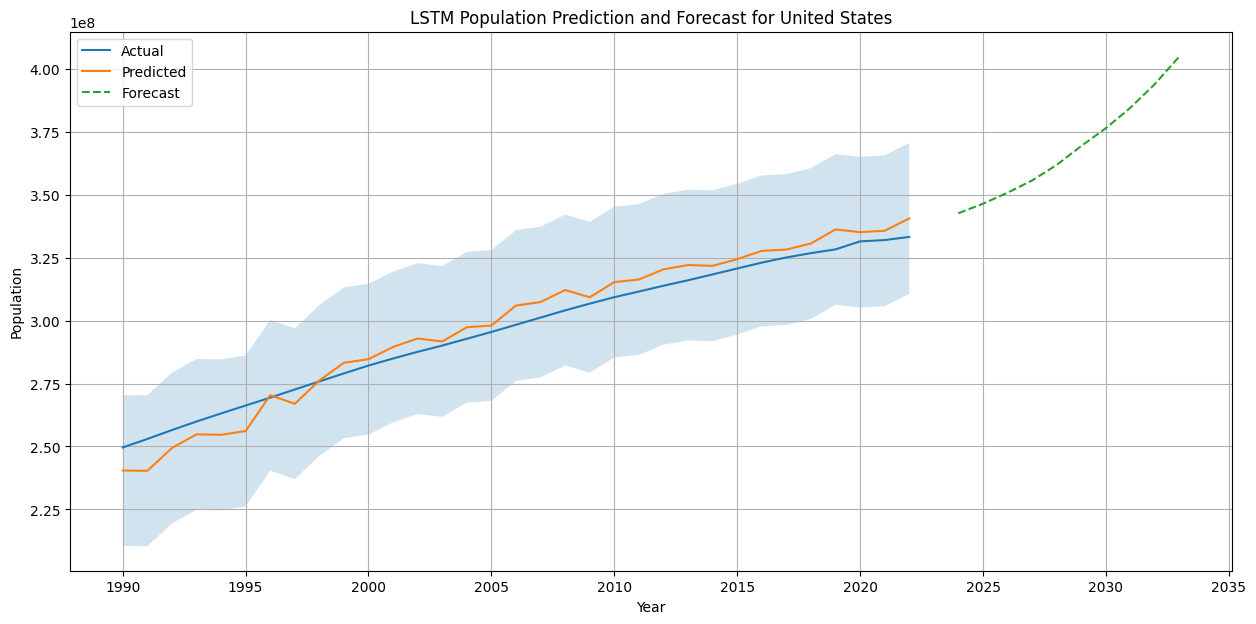

Mean Absolute Error: 5281540.81818182
Root Mean Squared Error: 5914457.88612345

Forecast for the next 10 years:
2023: 342677248
2024: 346469344
2025: 350852448
2026: 355706240
2027: 361871936
2028: 369405024
2029: 376474272
2030: 384622752
2031: 394067968
2032: 405096224
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted year 1990-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted year 1991-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted year 1992-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted year 1993-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted year 1994-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted year 1995-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted year 1996-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted year 1997-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted year 1998-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted year 1999-01-01 00:00:

/tmp/ipykernel_1314127/2650934579.py:111: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')


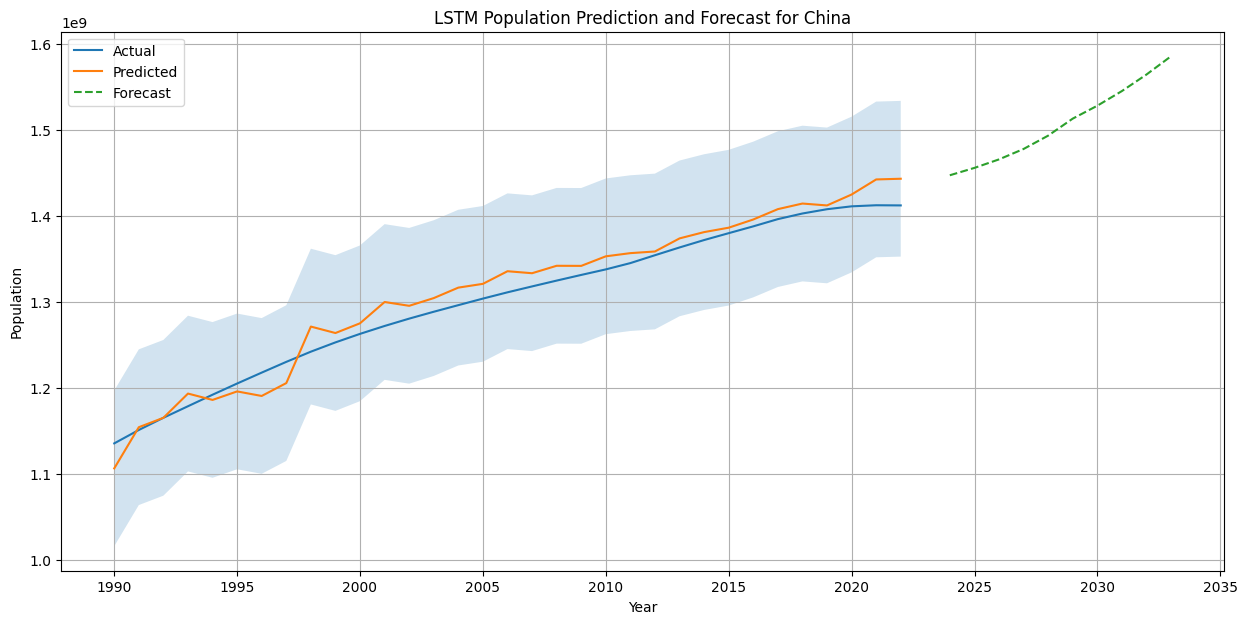

Mean Absolute Error: 15099256.0
Root Mean Squared Error: 17325180.24798477

Forecast for the next 10 years:
2023: 1447254400
2024: 1455840128
2025: 1465744512
2026: 1477857920
2027: 1493368832
2028: 1513206400
2029: 1528204800
2030: 1545243776
2031: 1564477440
2032: 1585825792
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted year 1990-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted year 1991-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted year 1992-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted year 1993-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted year 1994-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted year 1995-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted year 1996-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted year 1997-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted year 1998-01-01 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted year 1999-01-01 0

/tmp/ipykernel_1314127/2650934579.py:111: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')


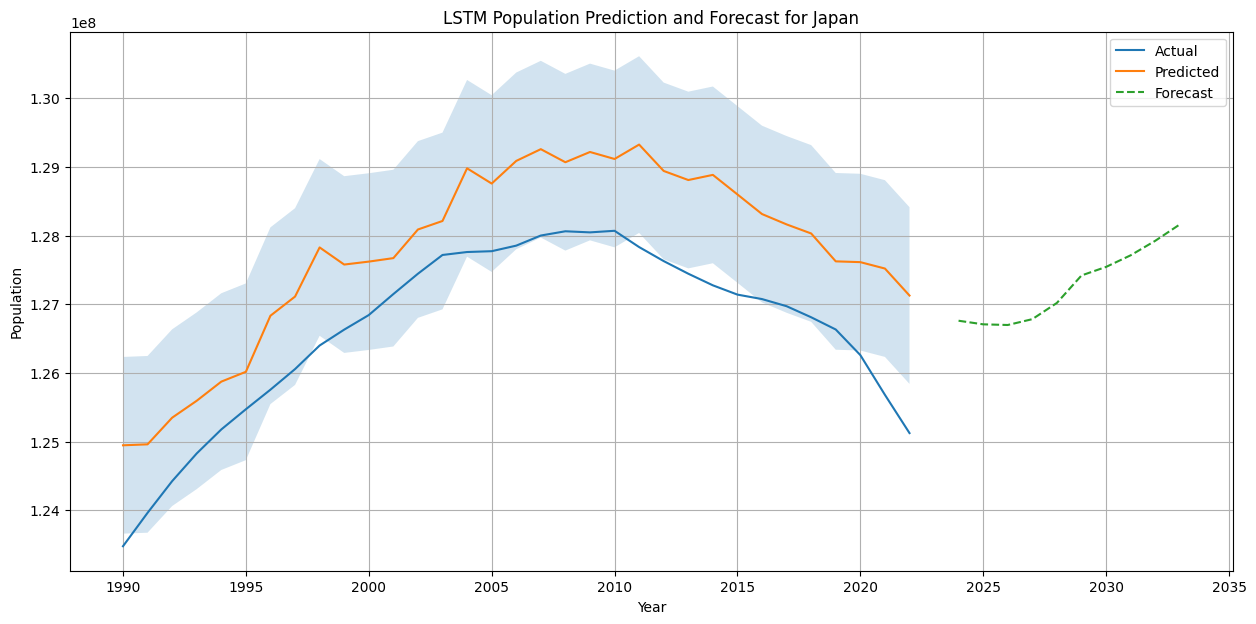

Mean Absolute Error: 1131223.3333333328
Root Mean Squared Error: 1184743.3451059803

Forecast for the next 10 years:
2023: 126760760
2024: 126708304
2025: 126698656
2026: 126783584
2027: 127019576
2028: 127419856
2029: 127544176
2030: 127712864
2031: 127923760
2032: 128162736


In [16]:
for country_name, country_data in countries_for_test.items():
    #exp_smoothing(country_data, country_name)
    #arima(country_data, country_name)
    #arima2(country_data, country_name)
    #prophet(country_data, country_name)
    #lstm(country_data, country_name)
    #lstm_walk_forward(country_data, country_name)
    lstm_walk_forward_and_forecast(country_data, country_name)